In [7]:
import pandas as pd

In [8]:
dados_telecom = pd.read_json('/content/TelecomX_Data.json')

In [9]:
dados_telecom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [10]:
dados_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [11]:
dados_telecom.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [12]:
dados_telecom.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [13]:
customer_df = dados_telecom["customer"].apply(pd.Series)
phone_df = dados_telecom["phone"].apply(pd.Series)
internet_df = dados_telecom["internet"].apply(pd.Series)
account_df = dados_telecom["account"].apply(pd.Series)

In [14]:
dados_telecom_expandido = pd.concat([
    dados_telecom.drop(columns=["customer", "phone", "internet", "account"]),
    customer_df,
    phone_df,
    internet_df,
    account_df
], axis=1)

In [15]:
dados_telecom_expandido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


In [16]:
dados_telecom_expandido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

In [17]:
charges_df = dados_telecom_expandido["Charges"].apply(pd.Series)

In [18]:
dados_telecom_expandido = pd.concat([
    dados_telecom_expandido.drop(columns=["Charges"]),
    charges_df
], axis=1)

In [19]:
dados_telecom_expandido[["Monthly", "Total"]].head()


,Monthly,Total
0,65.6,593.3
1,59.9,542.4
2,73.9,280.85
3,98.0,1237.85
4,83.9,267.4


In [20]:
dados_telecom_expandido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [21]:
dados_telecom_expandido["Contas_Diarias"] = dados_telecom_expandido["Monthly"] / 30

In [22]:
dados_telecom_expandido[["Monthly", "Contas_Diarias"]].head()

,Monthly,Contas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [23]:
dados_telecom_expandido["Contas_Diarias"] = dados_telecom_expandido["Contas_Diarias"].round(2)


In [24]:
dados_telecom_expandido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.80


In [25]:
colunas_binarias = ['Churn','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']

In [26]:
for col in colunas_binarias:
    dados_telecom_expandido[col] = dados_telecom_expandido[col].map({'Yes': 1, 'No': 0})

In [27]:
dados_telecom_expandido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Contas_Diarias
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Month-to-month,0,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Month-to-month,1,Mailed check,83.9,267.4,2.80


In [30]:
dados_telecom_expandido[colunas_binarias] = dados_telecom_expandido[colunas_binarias].fillna(0).astype(int)

In [31]:
dados_telecom_expandido.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Contas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.80


In [36]:
dados_telecom_expandido.rename(columns={
    'customerID': 'id_cliente',
    'Churn': 'evadiu',
    'gender': 'genero',
    'SeniorCitizen': 'idoso',
    'Partner': 'tem_parceiro',
    'Dependents': 'tem_dependentes',
    'tenure': 'meses_contrato',
    'PhoneService': 'servico_telefonico',
    'MultipleLines': 'multiplas_linhas',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguranca_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'protecao_dispositivo',
    'TechSupport': 'suporte_tecnico',
    'StreamingTV': 'tv_streaming',
    'StreamingMovies': 'filmes_streaming',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'fatura_digital',
    'PaymentMethod': 'metodo_pagamento',
    'Monthly': 'valor_mensal',
    'Total': 'valor_total',
    'Contas_Diarias': 'valor_diario'
}, inplace=True)

In [37]:
dados_telecom_expandido.head()

,id_cliente,evadiu,genero,idoso,tem_parceiro,tem_dependentes,meses_contrato,servico_telefonico,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,valor_total,valor_diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.80


In [38]:
dados_telecom_expandido.columns

Index(['id_cliente', 'evadiu', 'genero', 'idoso', 'tem_parceiro',
       'tem_dependentes', 'meses_contrato', 'servico_telefonico',
       'multiplas_linhas', 'tipo_internet', 'seguranca_online',
       'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
       'tv_streaming', 'filmes_streaming', 'tipo_contrato', 'fatura_digital',
       'metodo_pagamento', 'valor_mensal', 'valor_total', 'valor_diario'],
      dtype='object')

In [39]:
dados_telecom_expandido.describe()

,evadiu,idoso,tem_parceiro,tem_dependentes,meses_contrato,servico_telefonico,multiplas_linhas,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,fatura_digital,valor_mensal,valor_diario
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2.157292
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,3.960000


In [40]:
print(dados_telecom_expandido['evadiu'].value_counts())

evadiu
0    5398
1    1869
Name: count, dtype: int64


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-77-2149918361.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='evadiu', data=dados_telecom_expandido, palette='tab10')


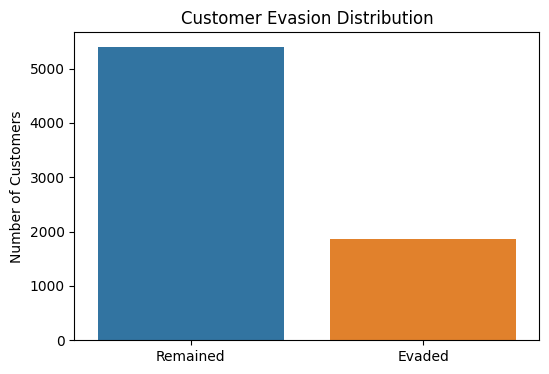

In [77]:
plt.figure(figsize=(6, 4))
sns.countplot(x='evadiu', data=dados_telecom_expandido, palette='tab10')
plt.title('Customer Evasion Distribution')
plt.xlabel("")
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['Remained', 'Evaded'])
plt.show()

In [64]:
def taxa_evasao_por_categoria(df, coluna):
    return df.groupby(coluna)['evadiu'].mean().sort_values(ascending=False).mul(100).round(0).astype(int)

In [65]:
print("Taxa de evasão por gênero:")
print(taxa_evasao_por_categoria(dados_telecom_expandido, 'genero'))

print("\nTaxa de evasão por tipo de contrato:")
print(taxa_evasao_por_categoria(dados_telecom_expandido, 'tipo_contrato'))

print("\nTaxa de evasão por método de pagamento:")
print(taxa_evasao_por_categoria(dados_telecom_expandido, 'metodo_pagamento'))

Taxa de evasão por gênero:
genero
Female    26
Male      25
Name: evadiu, dtype: int64

Taxa de evasão por tipo de contrato:
tipo_contrato
Month-to-month    41
One year          11
Two year           3
Name: evadiu, dtype: int64

Taxa de evasão por método de pagamento:
metodo_pagamento
Electronic check             44
Mailed check                 18
Bank transfer (automatic)    16
Credit card (automatic)      15
Name: evadiu, dtype: int64


In [66]:
import matplotlib.pyplot as plt

In [67]:
dados = taxa_evasao_por_categoria(dados_telecom_expandido, 'tipo_contrato')

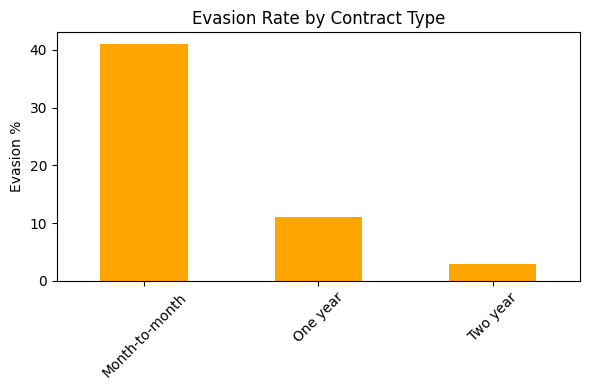

In [95]:
plt.figure(figsize=(6,4))
dados.plot(kind='bar', color='orange')
plt.title('Evasion Rate by Contract Type')
plt.ylabel('Evasion %')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
dados_telecom_expandido.groupby('evadiu')[['valor_total', 'meses_contrato', 'valor_mensal', 'valor_diario']].describe()

meses_contrato                                                     \
                count       mean        std  min   25%   50%   75%   max   
evadiu                                                                     
0              5398.0  37.321045  24.178367  0.0  14.0  37.0  61.0  72.0   
1              1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

       valor_mensal             ...                  valor_diario            \
              count       mean  ...      75%     max        count      mean   
evadiu                          ...                                           
0            5398.0  61.354224  ...  88.6375  118.75       5398.0  2.045056   
1            1869.0  74.441332  ...  94.2000  118.35       1869.0  2.481450   

                                                  
             std   min   25%   50%     75%   max  
evadiu                                            
0       1.036908  0.61  0.84  2.15  2.9575  3.96  
1       0.822287  0.63  1.87  2.66  3.1400  3.94  

[2 rows x 24 columns]

In [82]:
print(dados_telecom_expandido[['valor_mensal', 'valor_total']].dtypes)

valor_mensal    float64
valor_total      object
dtype: object


In [83]:
dados_telecom_expandido['valor_total'] = pd.to_numeric(dados_telecom_expandido['valor_total'], errors='coerce')

In [84]:
print(dados_telecom_expandido[['valor_mensal', 'valor_total']].dtypes)

valor_mensal    float64
valor_total     float64
dtype: object


In [85]:
dados_telecom_expandido.groupby('evadiu')[['valor_total', 'meses_contrato', 'valor_mensal', 'valor_diario']].mean()


,valor_total,meses_contrato,valor_mensal,valor_diario
evadiu,,,,
0,2540.440867,37.321045,61.354224,2.045056
1,1531.796094,17.979133,74.441332,2.481450


/tmp/ipython-input-94-457994876.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='evadiu', y='valor_total', data=dados_telecom_expandido, palette=['orange', 'blue'])


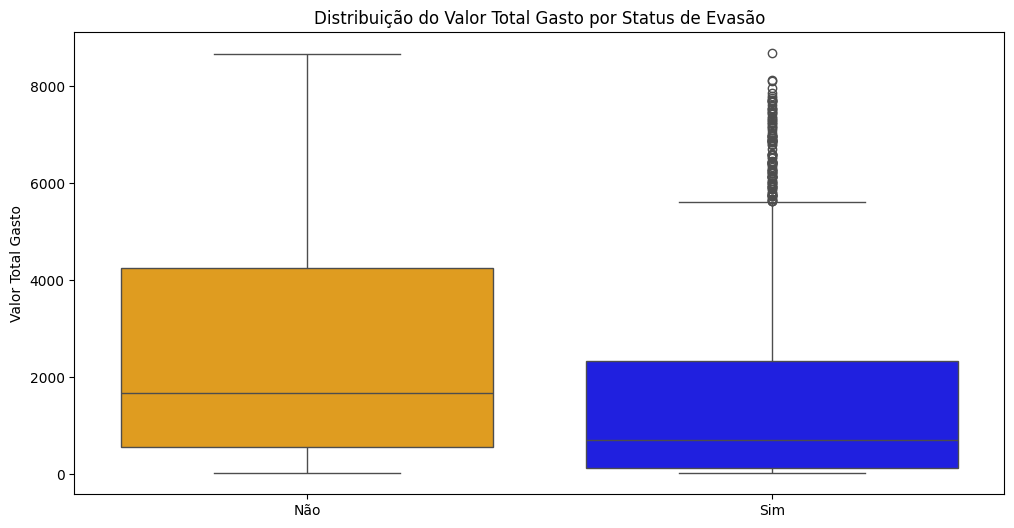

In [94]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='evadiu', y='valor_total', data=dados_telecom_expandido, palette=['orange', 'blue'])
plt.title('Distribuição do Valor Total Gasto por Status de Evasão')
plt.xlabel('')
plt.ylabel('Valor Total Gasto')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

Iniício

O objetivo desta análise é compreender os fatores que influenciam a evasão de clientes churn na Telecom X. A evasão de clientes impacta diretamente a receita e o crescimento da empresa, tornando essencial identificar padrões e características associadas a essa saída para desenvolver estratégias que
minimizem esse problema.

Etapas

- Etapa 1 - Importação de arquivo e análise
Os dados foram importados a partir de um arquivo JSON contendo informações detalhadas sobre os clientes, incluindo dados demográficos, tipo de serviço contratado e status de evasão.
- Etapa 2 - Tratamento de Dados
Na etapa de tratamento, foi realizada a expansão das colunas com informações em formato dicionário, além da padronização dos dados, conversão de variáveis categóricas para valores binários, e criação de novas colunas relevantes, como o faturamento diário.
Verificamos também a ausência de valores nulos e duplicados, garantindo a qualidade dos dados para análise.
- Etapa 3 - Análise dos Dados atráves de Gráficos e Manipulação
Visualização da proporção de clientes que evadiram de acordo com suas respectivas categorias.
- OBS: - A conversão de variáveis categóricas para formato binário e a criação de métricas diárias auxiliaram na clareza da análise.

Conclusões

- Clientes com contratos de curto prazo (mensais) têm maior probabilidade de evasão.
- O método de pagamento por "Electronic check" está associado a uma taxa de evasão mais elevada.
- O total gasto e o tempo de contrato apresentam diferenças claras entre clientes que permanecem e os que evadem
